https://pytorch.org/docs/stable/torchvision/transforms.html

In [2]:
!pip3 install torch==0.4.0
!pip3 install torchvision==0.2.1

    100% |████████████████████████████████| 484.0MB 27kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5ce62000 @  0x7f25fde041c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
    100% |████████████████████████████████| 61kB 2.7MB/s 
    100% |████████████████████████████████| 2.0MB 7.5MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
import torch 
import torchvision
from torchvision import datasets, transforms
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#torchvision.transforms

変換は一般的な画像変換です。 Composeを使用して処理を繋げることができます。


```
class torchvision.transforms.Compose(transforms)
```

複数の変換処理を纏めて作成します。

In [3]:
transforms.Compose([
    transforms.CenterCrop(10),
    transforms.ToTensor(),
])

Compose(
    CenterCrop(size=(10, 10))
    ToTensor()
)

データを表示する。

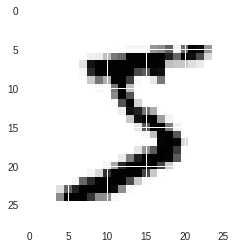

In [30]:
mnist = datasets.MNIST('../data', train=True, download=True)
mnist_image = mnist.train_data[0]
plt.imshow(mnist_image)
plt.show()

transformsのオプションに設定することで、画像の何かしらの処理を挟むことができます。

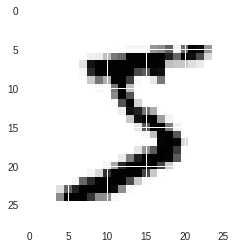

In [29]:
mnist = datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))
mnist_image = mnist.train_data[0]
plt.imshow(mnist_image)
plt.show()

torch.Size([1, 28, 28])
torch.Size([28, 28])


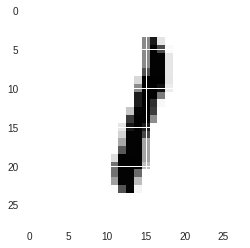

In [57]:
mnist = datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))
dataloader = torch.utils.data.DataLoader(mnist, batch_size=10,
                                         shuffle=True, num_workers=1)
for i, data in enumerate(dataloader, 0):
    print(data[0][0].size())
    mnist_image = data[0][0].reshape(28, 28)
    print(mnist_image.shape)
    plt.imshow(mnist_image)
    plt.show()
    break

# Transforms on PIL Image



## 与えられたPIL画像を中央で切り取る。

```
class torchvision.transforms.CenterCrop(size)
```

Processing...
Done!
torch.Size([1, 10, 10])
torch.Size([10, 10])


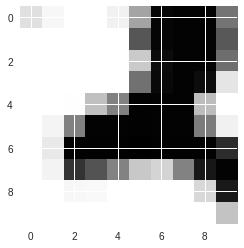

In [4]:
mnist = datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.CenterCrop(10),
                           transforms.ToTensor()
                       ]))
dataloader = torch.utils.data.DataLoader(mnist, batch_size=10,
                                         shuffle=True, num_workers=1)
for i, data in enumerate(dataloader, 0):
    print(data[0][0].size())
    mnist_image = data[0][0].reshape(10, 10)
    print(mnist_image.shape)
    plt.imshow(mnist_image)
    plt.show()
    break


## PIL画像を4つのコーナーと中央の作物にトリミング

In [0]:
# mnist = datasets.MNIST('../data', train=True, download=True,
#                        transform=transforms.Compose([
#                             transforms.FiveCrop(10), # this is a list of PIL Images
#                             transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])), # returns a 4D tensor
#                             transforms.ToTensor()
#                        ]))
# dataloader = torch.utils.data.DataLoader(mnist, batch_size=10,
#                                          shuffle=True, num_workers=1)
# for i, data in enumerate(dataloader, 0):
#     print(data[0][0].size())
#     mnist_image = data[0][0].reshape(10, 10)
#     print(mnist_image.shape)
#     plt.imshow(mnist_image)
#     plt.show()
#     break


## 画像をグレースケールに変換

```
class torchvision.transforms.Grayscale(num_output_channels=1)
```

In [12]:
STL10 = torchvision.datasets.STL10(root='./data_STL10/',
                                           transform=transforms.Compose([
                                               transforms.Grayscale(),
                                               transforms.ToTensor()
                                           ]),
                                           split='train',
                                           download=True)

Files already downloaded and verified


torch.Size([96, 96])
torch.Size([96, 96])


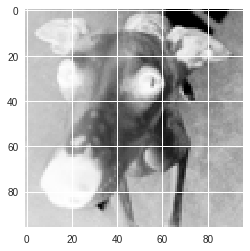

In [13]:
# Data loader
dataloader = torch.utils.data.DataLoader(dataset=STL10,
                                           batch_size=10, 
                                           shuffle=True)

for i, (images, labels) in enumerate(dataloader):
    print(images[0][0].size())
    STL10_image = images[0][0].reshape(96, 96)
    print(STL10_image.shape)
    plt.imshow(STL10_image)
    plt.show()
    break

Files already downloaded and verified
torch.Size([1, 32, 32])
torch.Size([32, 32])


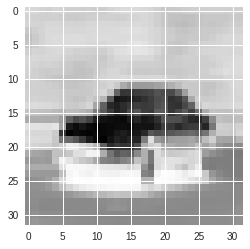

In [22]:
cifar10 = datasets.CIFAR10('../data_cifar10', download=True,
                       transform=transforms.Compose([
                            transforms.Grayscale(),
                            transforms.ToTensor()
                       ]))
dataloader = torch.utils.data.DataLoader(cifar10, batch_size=10,
                                         shuffle=True, num_workers=1)
for i, data in enumerate(dataloader, 0):
    print(data[0][0].size())
    cifar10_image = data[0][0].reshape(32, 32)
    print(cifar10_image.shape)
    plt.imshow(cifar10_image)
    plt.show()
    break


## オフラインで計算された平方変換行列を用いてテンソル画像を変換

```
class torchvision.transforms.LinearTransformation(transformation_matrix)
```

In [0]:
# mnist = datasets.MNIST('../data', train=True, download=True,
#                        transform=transforms.Compose([
#                            transforms.LinearTransformation((28, 28)),
#                            transforms.ToTensor()
#                        ]))
# dataloader = torch.utils.data.DataLoader(mnist, batch_size=10,
#                                          shuffle=True, num_workers=1)
# for i, data in enumerate(dataloader, 0):
#     print(data[0][0].size())
#     mnist_image = data[0][0].reshape(28, 28)
#     print(mnist_image.shape)
#     plt.imshow(mnist_image)
#     plt.show()
#     break

##  "パッド"の値ですべての辺に与えられたPIL画像を埋め込み

```
class torchvision.transforms.Pad(padding, fill=0, padding_mode='constant')
```

Processing...
Done!
torch.Size([1, 30, 30])
torch.Size([30, 30])


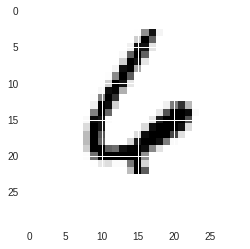

In [4]:
mnist = datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.Pad(1),
                           transforms.ToTensor()
                       ]))
dataloader = torch.utils.data.DataLoader(mnist, batch_size=10,
                                         shuffle=True, num_workers=1)
for i, data in enumerate(dataloader, 0):
    print(data[0][0].size())
    mnist_image = data[0][0].reshape(30, 30)
    print(mnist_image.shape)
    plt.imshow(mnist_image)
    plt.show()
    break

torch.Size([1, 32, 32])
torch.Size([32, 32])


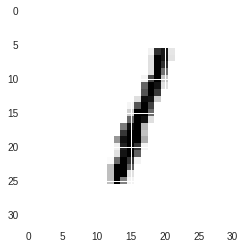

In [5]:
mnist = datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.Pad(2),
                           transforms.ToTensor()
                       ]))
dataloader = torch.utils.data.DataLoader(mnist, batch_size=10,
                                         shuffle=True, num_workers=1)
for i, data in enumerate(dataloader, 0):
    print(data[0][0].size())
    mnist_image = data[0][0].reshape(32, 32)
    print(mnist_image.shape)
    plt.imshow(mnist_image)
    plt.show()
    break

## 画像保持中心不変のランダムアフィン変換

```
class torchvision.transforms.RandomAffine(degrees, translate=None, scale=None, shear=None, resample=False, fillcolor=0)
```

torch.Size([1, 28, 28])
torch.Size([28, 28])


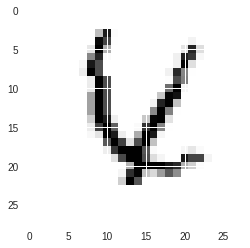

In [8]:
mnist = datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                            transforms.RandomAffine(7),
                            transforms.ToTensor()
                       ]))
dataloader = torch.utils.data.DataLoader(mnist, batch_size=10,
                                         shuffle=True, num_workers=1)
for i, data in enumerate(dataloader, 0):
    print(data[0][0].size())
    mnist_image = data[0][0].reshape(28, 28)
    print(mnist_image.shape)
    plt.imshow(mnist_image)
    plt.show()
    break


## 与えられた確率で変換のリストをランダムに適用

torch.Size([1, 28, 28])
torch.Size([28, 28])


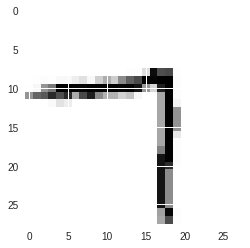

In [17]:
mnist = datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                          transforms.RandomApply(p=0.5,
                              transforms=[
                                transforms.RandomAffine(degrees=[-45, 45],
                                    translate=[0.15, 0.15],
                                    scale=[1.0, 1.2]),
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomVerticalFlip()]),
                            transforms.ToTensor()
                       ]))
dataloader = torch.utils.data.DataLoader(mnist, batch_size=10,
                                         shuffle=True, num_workers=1)
for i, data in enumerate(dataloader, 0):
    print(data[0][0].size())
    mnist_image = data[0][0].reshape(28, 28)
    print(mnist_image.shape)
    plt.imshow(mnist_image)
    plt.show()
    break


## リストからランダムに選択した単一の変換を適用

```
class torchvision.transforms.RandomChoice(transforms)
```


In [20]:
l = list(range(10))
t = transforms.RandomChoice(l)
print(t)

RandomChoice(
    0
    1
    2
    3
    4
    5
    6
    7
    8
    9
)


## PIL画像をランダムなサイズとアスペクト比にトリミング


```
class torchvision.transforms.RandomResizedCrop(size, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=2)
```

torch.Size([1, 224, 224])
torch.Size([224, 224])


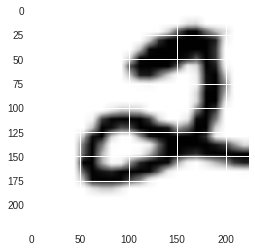

In [62]:
mnist = datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                            transforms.RandomResizedCrop(224),
                            transforms.ToTensor()
                       ]))
dataloader = torch.utils.data.DataLoader(mnist, batch_size=10,
                                         shuffle=True, num_workers=1)
for i, data in enumerate(dataloader, 0):
    print(data[0][0].size())
    mnist_image = data[0][0].reshape(224, 224)
    print(mnist_image.shape)
    plt.imshow(mnist_image)
    plt.show()
    break


## 画像を回転させる

```
class torchvision.transforms.RandomRotation(degrees, resample=False, expand=False, center=None)
```

torch.Size([1, 28, 28])
torch.Size([28, 28])


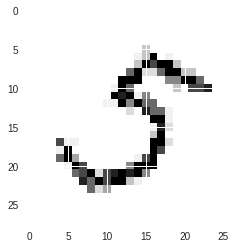

tensor(5)


In [45]:
mnist = datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                            transforms.RandomRotation(90),
                            transforms.ToTensor()
                       ]))
dataloader = torch.utils.data.DataLoader(mnist, batch_size=10,
                                         shuffle=True, num_workers=1)
for i, data in enumerate(dataloader, 0):
    print(data[0][0].size())
    mnist_image = data[0][0].reshape(28, 28)
    print(mnist_image.shape)
    plt.imshow(mnist_image)
    plt.show()
    print(data[1][0]) #label
    break


## PIL画像を与えられた確率でランダムに垂直に反転

```
class torchvision.transforms.RandomVerticalFlip(p=0.5)[
```

torch.Size([1, 28, 28])
torch.Size([28, 28])


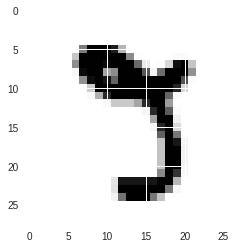

tensor(2)


In [44]:
mnist = datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                            transforms.RandomVerticalFlip(0.5),
                            transforms.ToTensor()
                       ]))
dataloader = torch.utils.data.DataLoader(mnist, batch_size=10,
                                         shuffle=True, num_workers=1)
for i, data in enumerate(dataloader, 0):
    print(data[0][0].size())
    mnist_image = data[0][0].reshape(28, 28)
    print(mnist_image.shape)
    plt.imshow(mnist_image)
    plt.show()
    print(data[1][0]) #label
    break


## PIL画像のサイズを指定したサイズに変更

```
class torchvision.transforms.Resize(size, interpolation=2)
```

torch.Size([1, 20, 20])
torch.Size([20, 20])


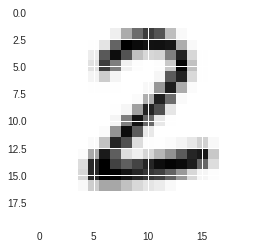

tensor(2)


In [47]:
mnist = datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                            transforms.Resize(20),
                            transforms.ToTensor()
                       ]))
dataloader = torch.utils.data.DataLoader(mnist, batch_size=10,
                                         shuffle=True, num_workers=1)
for i, data in enumerate(dataloader, 0):
    print(data[0][0].size())
    mnist_image = data[0][0].reshape(20, 20)
    print(mnist_image.shape)
    plt.imshow(mnist_image)
    plt.show()
    print(data[1][0]) #label
    break


## PIL画像を4つのコーナーにトリミングし、中央のトリミングとこれらの反転

```
class torchvision.transforms.TenCrop(size, vertical_flip=False)
```

In [0]:
# mnist = datasets.MNIST('../data', train=True, download=True,
#                        transform=transforms.Compose([
#                             transforms.TenCrop((20, 20)),
#                             transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])),
#                             transforms.ToTensor()
#                        ]))
# dataloader = torch.utils.data.DataLoader(mnist, batch_size=10,
#                                          shuffle=True, num_workers=1)
# for i, data in enumerate(dataloader, 0):
#     print(data[0][0].size())
#     mnist_image = data[0][0].reshape(20, 20)
#     print(mnist_image.shape)
#     plt.imshow(mnist_image)
#     plt.show()
#     print(data[1][0]) #label
#     break


## テンソル画像を平均と標準偏差で正規化

```
class torchvision.transforms.Normalize(mean, std)
```

mean（シーケンス） - 各チャンネルの平均シーケンス。     
std（シーケンス） - 各チャンネルの標準偏差のシーケンス。    

In [75]:
cifar10 = datasets.CIFAR10('../data_cifar10', download=True,
                       transform=transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                       ]))
dataloader = torch.utils.data.DataLoader(cifar10, batch_size=10,
                                         shuffle=True, num_workers=1)
for i, data in enumerate(dataloader, 0):
    print(data[0][0].size())
    cifar10_image = data[0][0]
    print(cifar10_image)
    break


Files already downloaded and verified
torch.Size([3, 32, 32])
tensor([[[ 0.9608,  1.0000,  0.3255,  ...,  0.7882,  0.9373,  0.9059],
         [ 0.9765,  0.6157,  0.2392,  ...,  0.3098,  0.7569,  0.8667],
         [ 0.8275,  0.2000,  0.3255,  ...,  0.2314,  0.2627,  0.8196],
         ...,
         [ 0.9922,  0.9843,  0.9608,  ...,  0.9922,  1.0000,  1.0000],
         [ 1.0000,  0.9843,  0.9922,  ...,  1.0000,  1.0000,  1.0000],
         [ 1.0000,  0.9843,  0.9922,  ...,  1.0000,  1.0000,  1.0000]],

        [[ 0.9922,  0.9765,  0.1373,  ...,  0.8039,  0.9294,  0.9922],
         [ 0.9765,  0.5529,  0.0588,  ...,  0.3882,  0.8039,  0.9765],
         [ 0.7961,  0.1216,  0.1608,  ...,  0.3333,  0.3098,  0.8510],
         ...,
         [ 0.9922,  0.9765,  0.9608,  ...,  0.9922,  1.0000,  1.0000],
         [ 1.0000,  0.9843,  0.9843,  ...,  0.9843,  0.9922,  0.9922],
         [ 1.0000,  0.9843,  0.9843,  ...,  0.9922,  0.9922,  0.9922]],

        [[ 1.0000,  0.9608,  0.0196,  ...,  0.7961,  0

In [70]:
# w, h, c = 
cifar10 = datasets.CIFAR10('../data_cifar10', download=True,
                       transform=transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                       ]))
dataloader = torch.utils.data.DataLoader(cifar10, batch_size=10,
                                         shuffle=True, num_workers=1)
for i, data in enumerate(dataloader, 0):
    print(data[0][0].size())
    cifar10_image = data[0][0]
    print(cifar10_image)
    break


Files already downloaded and verified
torch.Size([3, 32, 32])
tensor([[[-0.0510, -0.0431,  0.0039,  ..., -0.0745, -0.0902, -0.0196],
         [-0.0275,  0.0431,  0.0824,  ..., -0.0275, -0.0510,  0.0275],
         [ 0.0431,  0.0824,  0.1373,  ...,  0.0275,  0.0118,  0.0902],
         ...,
         [-0.5451, -0.5529, -0.5608,  ..., -0.4118, -0.4118, -0.3412],
         [-0.5765, -0.5765, -0.5843,  ..., -0.3882, -0.4431, -0.4118],
         [-0.6314, -0.6078, -0.6157,  ..., -0.4588, -0.4824, -0.5059]],

        [[ 0.3569,  0.3725,  0.3490,  ...,  0.3882,  0.3725,  0.3255],
         [ 0.3725,  0.3647,  0.2941,  ...,  0.4275,  0.4118,  0.3647],
         [ 0.4196,  0.4275,  0.3647,  ...,  0.4902,  0.4745,  0.4353],
         ...,
         [-0.5373, -0.5529, -0.5686,  ..., -0.5137, -0.5059, -0.4118],
         [-0.5529, -0.5608, -0.5765,  ..., -0.4745, -0.5216, -0.4667],
         [-0.5922, -0.5843, -0.6078,  ..., -0.5216, -0.5373, -0.5373]],

        [[ 0.7725,  0.8667,  0.8196,  ...,  0.8667,  0

# 変換

## テンソルまたはndarrayをPIL Imageに変換

```
class torchvision.transforms.ToPILImage(mode=None)
```

トーチを変換します。*値の範囲を保持しながら、形状CxHxWのテンソルまたは形状HxWxCのnumpyのndarrayをPIL画像に変換します。

## PIL画像またはnumpy.ndarrayをテンソルに変換



## ユーザー定義ラムダをトランスフォームとして適用

```
class torchvision.transforms.Lambda(lambd)
```

In [85]:
def transform_lambda1(image):
    print ('transform_lambda1.')
    return image
  
cifar10 = datasets.CIFAR10('../data_cifar10', download=True,
                       transform=transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Lambda(lambda x: transform_lambda1(x))
                       ]))
dataloader = torch.utils.data.DataLoader(cifar10, batch_size=1,
                                         shuffle=True, num_workers=1)
for i, data in enumerate(dataloader, 0):
    print(data[0][0].size())
    cifar10_image = data[0][0]
    print(cifar10_image)
    break


Files already downloaded and verified
transform_lambda1.
transform_lambda1.
transform_lambda1.
torch.Size([3, 32, 32])
tensor([[[ 0.8706,  0.8667,  0.8745,  ...,  0.8667,  0.8588,  0.8510],
         [ 0.8706,  0.8667,  0.8706,  ...,  0.8588,  0.8510,  0.8471],
         [ 0.8706,  0.8706,  0.8745,  ...,  0.8588,  0.8549,  0.8431],
         ...,
         [ 0.4941,  0.4902,  0.5137,  ...,  0.6510,  0.6196,  0.5294],
         [ 0.4000,  0.3922,  0.4549,  ...,  0.5294,  0.5059,  0.4314],
         [ 0.4667,  0.4627,  0.4902,  ...,  0.4588,  0.4392,  0.3922]],

        [[ 0.8863,  0.8824,  0.8902,  ...,  0.8980,  0.8902,  0.8824],
         [ 0.8863,  0.8824,  0.8863,  ...,  0.8863,  0.8824,  0.8784],
         [ 0.8863,  0.8863,  0.8902,  ...,  0.8902,  0.8863,  0.8745],
         ...,
         [ 0.4471,  0.4431,  0.4667,  ...,  0.6078,  0.5765,  0.4941],
         [ 0.3255,  0.3176,  0.3804,  ...,  0.4627,  0.4431,  0.3686],
         [ 0.3686,  0.3608,  0.3843,  ...,  0.3686,  0.3490,  0.3020]]